# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [2]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage import morphology
from skimage import filters
from skimage import measure
from skimage import draw
from skimage.draw import circle_perimeter
from skimage.morphology import erosion, disk, dilation, opening, closing, remove_small_objects, remove_small_holes
from skimage.filters import threshold_otsu, threshold_li, threshold_isodata, threshold_yen
from skimage.measure import label, regionprops
from skimage.draw import circle_perimeter


Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

In [1]:
Path = './images/'
image_name = 'FindingContours.png'
im = io.imread(Path.__add__(image_name))

a=morphology.disk(1, dtype=np.uint8)
plt.show()
plt.title('Disk 1')
io.imshow(morphology.binary_erosion(im, selem=a, out=None))


b=morphology.disk(10, dtype=np.uint8)
plt.show()
plt.title('Disk 10')
io.imshow(morphology.binary_erosion(im, selem=b, out=None))

c=morphology.disk(20, dtype=np.uint8)
plt.show()
plt.title('Disk 20')
io.imshow(morphology.binary_erosion(im, selem=c, out=None))

NameError: name 'io' is not defined

** Q.1.2 Dilation **

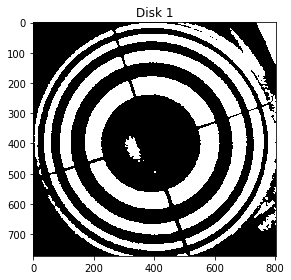

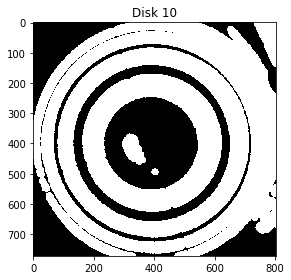

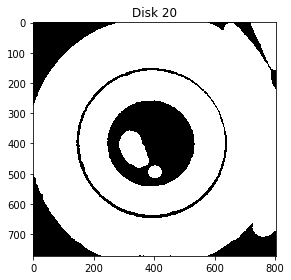

In [5]:
a=morphology.disk(1, dtype=np.uint8)
plt.show()
plt.title('Disk 1')
io.imshow(morphology.binary_dilation(im, selem=a, out=None))


b=morphology.disk(10, dtype=np.uint8)
plt.show()
plt.title('Disk 10')
io.imshow(morphology.binary_dilation(im, selem=b, out=None))

c=morphology.disk(20, dtype=np.uint8)
plt.show()
plt.title('Disk 20')
io.imshow(morphology.binary_dilation(im, selem=c, out=None))

** Q.1.3 Opening **

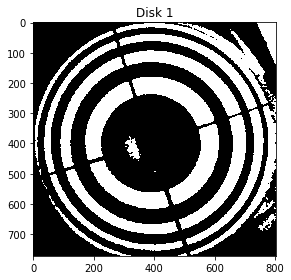

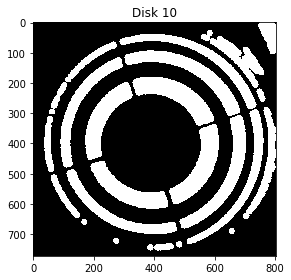

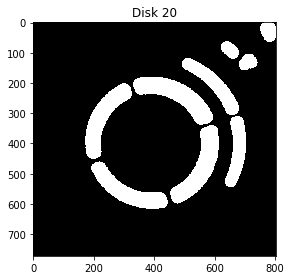

In [7]:
a=morphology.disk(1, dtype=np.uint8)
plt.show()
plt.title('Disk 1')
io.imshow(morphology.binary_opening(im, selem=a, out=None))

b=morphology.disk(10, dtype=np.uint8)
plt.show()
plt.title('Disk 10')
io.imshow(morphology.binary_opening(im, selem=b, out=None))

c=morphology.disk(20, dtype=np.uint8)
plt.show()
plt.title('Disk 20')
io.imshow(morphology.binary_opening(im, selem=c, out=None))

** Q.1.4 Closing**

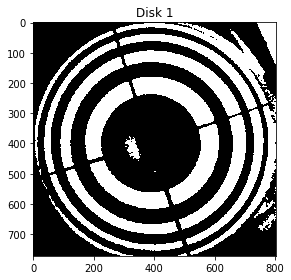

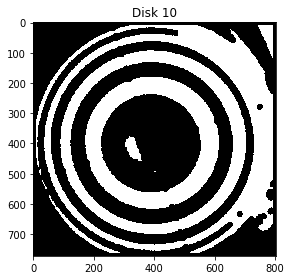

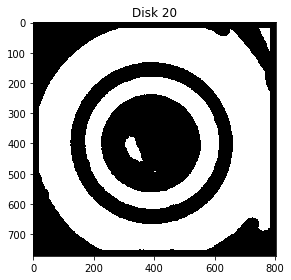

In [8]:
a=morphology.disk(1, dtype=np.uint8)
plt.show()
plt.title('Disk 1')
io.imshow(morphology.binary_closing(im, selem=a, out=None))

b=morphology.disk(10, dtype=np.uint8)
plt.show()
plt.title('Disk 10')
io.imshow(morphology.binary_closing(im, selem=b, out=None))

c=morphology.disk(20, dtype=np.uint8)
plt.show()
plt.title('Disk 20')
io.imshow(morphology.binary_closing(im, selem=c, out=None))

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/home/bhargav/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


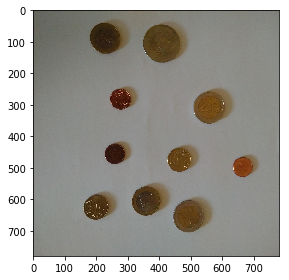

In [10]:
path = './images/'
img = rescale(img_as_ubyte(io.imread(Path.__add__('coins.jpg'))),.25)
io.imshow(img)

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

/home/bhargav/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/bhargav/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


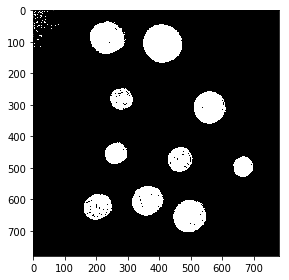

In [11]:
coins= io.imread('images/coins.jpg',as_grey=True)
img2=rescale(img_as_ubyte(coins),scale=0.25)

thresh = filters.threshold_otsu(img2)
image_out = img2 <= thresh
io.imshow(image_out)

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

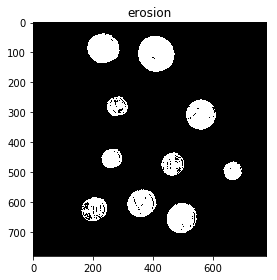

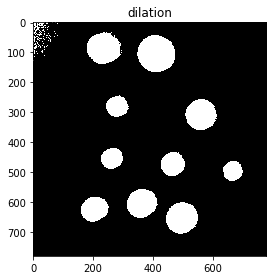

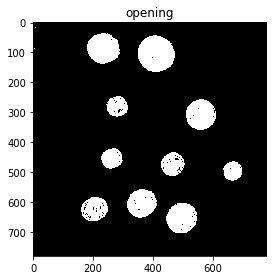

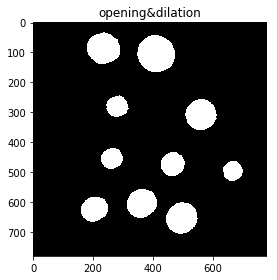

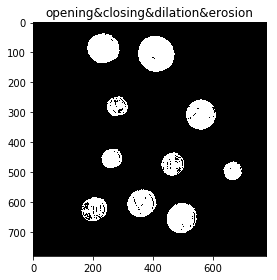

In [12]:
plt.show()
plt.title('erosion')
io.imshow(morphology.binary_erosion(image_out, selem=None, out=None))

plt.show()
plt.title('dilation')
io.imshow(morphology.binary_dilation(image_out, selem=None, out=None))

plt.show()
plt.title('opening')
io.imshow(morphology.binary_opening(image_out, selem=None, out=None))

x=morphology.binary_opening(image_out, selem=None, out=None)

y=morphology.binary_dilation(x, selem=None, out=None)
y3=morphology.disk(10, dtype=np.uint8)

plt.show()
plt.title('opening&dilation')
io.imshow(morphology.binary_closing(y, selem=y3, out=None))

y1=morphology.binary_erosion(image_out, selem=None, out=None)

plt.show()
plt.title('opening&closing&dilation&erosion')
io.imshow(morphology.binary_closing(y1, selem=None, out=None))

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


Number of regions found: 14
Radius of each region:
2.326213245840639
2.0342144725641096
2.0342144725641096
53.603948945773375
62.260563713688
2.0342144725641096
35.67356058711823
51.61024246780827
35.51706743167801
39.67821438856629
32.73272180700285
48.95137202562944
43.31418323329279
52.089091658720946


/home/bhargav/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


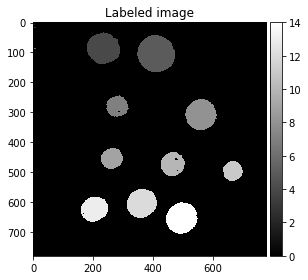

Text(0.5,1,'Circles on the labeled image')

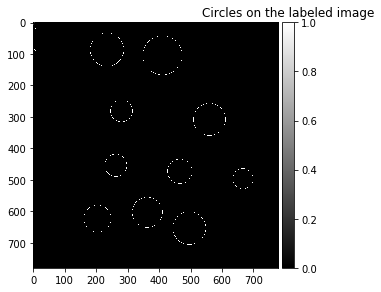

In [13]:
labeled = label(y)
regions = regionprops(labeled)
print('Number of regions found:', len(regions))
print('Radius of each region:')
for i in range (0, len(regions)):
    print(regions[i].equivalent_diameter/2)
mask = np.zeros_like(y)
for i in range (0, len(regions)):
    r, c = regions[i].centroid
    rad = int(regions[i].equivalent_diameter/2)
    rr, cc = circle_perimeter(int(r),int(c),rad)
    mask[rr, cc] = 1
    
plt.show()
plt.title('Labeled image')
io.imshow(labeled, cmap='gray')
plt.show()
io.imshow(mask, cmap='gray')
plt.title('Circles on the labeled image')

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

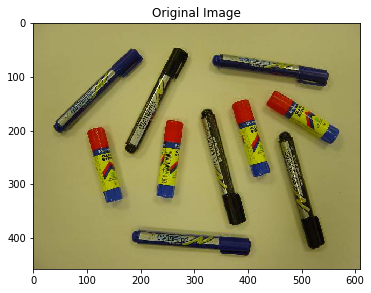

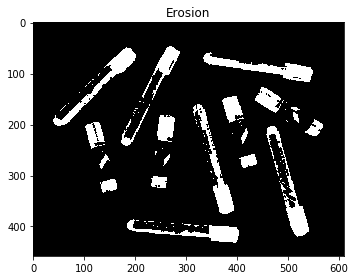

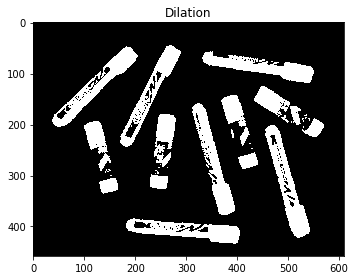

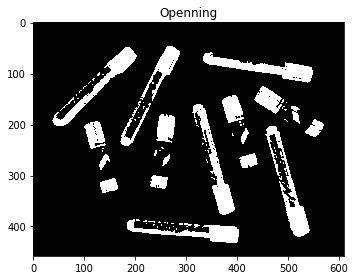

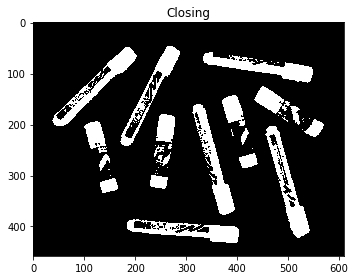

In [14]:
img_path = "./images/"
img_name = "objets4.jpg"
objects = io.imread(img_path.__add__(img_name))
io.imshow(objects)
plt.title('Original Image')

objects = rgb2gray(objects)
#threshold_li, threshold_isodata, threshold_yen - Different Thresholding methods
thresh = threshold_li(objects)
new_objects = objects <= thresh

eroded = erosion(new_objects, disk(1))
dilated = dilation(new_objects, disk(1))
openned = opening(new_objects, disk(1))
closed = closing(new_objects, disk(1))

plt.show()
plt.title('Erosion')
io.imshow(eroded)

plt.show()
plt.title('Dilation')
io.imshow(dilated)

plt.show()
plt.title('Openning')
io.imshow(openned)

plt.show()
plt.title('Closing')
io.imshow(closed)

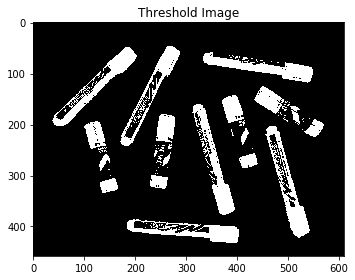

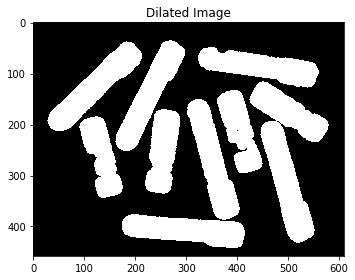

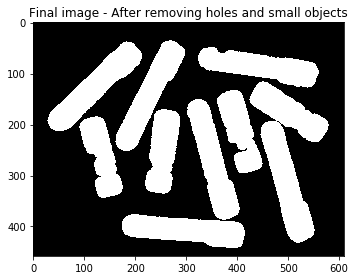

In [15]:
best_object = dilation(new_objects, disk(10)) # Defined dilated image as the best transformation image
transformed_objects = remove_small_holes(best_object,min_size=140) # Apply hole removal to refine the transformation
transformed_objects = remove_small_objects(transformed_objects,min_size=70) # Apply small objects removal to refine the transformation

plt.show()
plt.title('Threshold Image')
io.imshow(new_objects)

plt.show()
plt.title('Dilated Image')
io.imshow(best_object)

plt.show()
plt.title('Final image - After removing holes and small objects')
io.imshow(transformed_objects)



/home/bhargav/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


Text(0.5,1,'Labeled image')

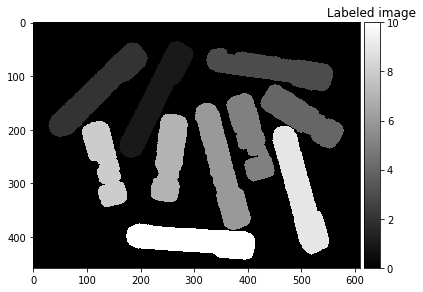

In [16]:
labeled_objects = label(transformed_objects)
io.imshow(labeled_objects, cmap='gray')
plt.title('Labeled image')

In [17]:
regions_objects = regionprops(labeled_objects)
print('Number of objects found:', len(regions_objects))
print('Area of each object found:')
areas = []
for i in range (0, len(regions_objects)):
    print(regions_objects[i].area)
    areas.append(regions_objects[i].area)
mean_area = np.mean(areas)
print('Mean area:',mean_area)

Number of objects found: 10
Area of each object found:
10561
10894
10519
8285
7806
10813
7924
7345
11376
10884
Mean area: 9640.7


In [18]:
glues = 0
markers = 0
for i in range (0, len(regions_objects)):
    if regions_objects[i].area > mean_area:
        markers = markers +1
    else:
        glues = glues + 1
print('Number of markers found:', markers)
print('Number of glues found:', glues)


Number of markers found: 6
Number of glues found: 4
